# States Analysis

In [16]:
import os
import sys
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.ticker import FormatStrFormatter
sys.path.append('..\\..\\neurokin\\')
from neurokin.kinematic_data import KinematicDataRun
from neurokin.utils.neural import processing, importing
from neurokin.utils.experiments import neural_states_helper, neural_correlates_plot, spider_factory
from neurokin.locomotion_states import NeuralCorrelatesStates

In [3]:
experiment_path = "./data/neural_correlates_cervical_dataset"
outputfolder = "./output_neural_correlates/"

NFFT = 2**12
NOV = int(NFFT/4)
TIME_CUTOFF = 1.5


pda = ["NWE00053", "NWE00054", "NWE00130", "NWE00160", "NWE00161", "NWE00162", "NWE00163", "NWE00164"]
skip_animals = ["NWE00053", "NWE00054", "NWE00052"]

CHANNEL_DICT = {"NWE00052": 6,
                "NWE00053": 1,
                "NWE00054": 1,
                "NWE00089": 1,
                "NWE00090": 1,
                "NWE00092": 1,
                "NWE00093": 1,
                "NWE00130": 3,
                "NWE00131": 2,
                "NWE00158": 3,
                "NWE00159": 3,
                "NWE00166": 3,
                "NWE00160": 3,
                "NWE00161": 3,
                "NWE00162": 3,
                "NWE00163": 3,
                "NWE00164": 3}

experiment_structure_path = experiment_path + "/experiment_structure.yaml"
conditions = ["baseline", "cervical125", "lumbar40"]

In [4]:
load_saved = False
save_computed_datasets = False

ncs = NeuralCorrelatesStates(timeslice=TIME_CUTOFF,
                            experiment_structure_filepath=experiment_structure_path,
                            skip_subjects=skip_animals)


#ncs.create_events_dataset(experiment_path, verbose=False)
ncs.events_dataset = pd.read_pickle("./raw_states.pkl")

In [5]:
#ncs.create_raw_neural_dataset(experiment_path, 
#                                  stream_names=["LFP1", "NPr1", "EOG1"],
#                                  ch_of_interest=CHANNEL_DICT)
ncs.raw_neural_correlates_dataset = pd.read_pickle("./raw_neural.pkl")
ncs.fs=24414.1

In [6]:
ncs.raw_neural_correlates_dataset.head(5)

,date,subject,condition,run,event_gait,event_nlm_rest,event_nlm_active,event_fog_rest,event_fog_active,fs
0,230525,NWE00160,baseline,09,[],"[[0.00028505633, 0.0002514952, 0.00024686247, ...",[],"[[-5.251616e-05, -2.5121648e-05, -2.7678883e-0...",[],24414.0625
1,230525,NWE00160,baseline,10,[],[],[],[],[],NaN
2,230525,NWE00160,baseline,18,[],[],[],[],[],NaN
3,230525,NWE00160,cervical40,03,[],[],[],[],[],NaN
4,230525,NWE00160,cervical40,17,"[[3.5766127e-05, -1.108076e-05, 1.40058355e-05...",[],[],[],[],24414.0625


In [7]:
ncs.create_psd_dataset(NFFT, NOV, zscore=True)

In [8]:
ncs.psds_correlates_dataset.head(5)

,date,subject,condition,run,fs,event_gait,event_nlm_rest,event_nlm_active,event_fog_rest,event_fog_active
0,230525,NWE00160,baseline,09,24414.0625,None,"[[10.539083, 41.68482, 11.901685, 0.85658735, ...",None,"[[9.614545, 40.348915, 8.879055, 4.4661875, 4....",None
1,230525,NWE00160,baseline,10,NaN,None,None,None,None,None
2,230525,NWE00160,baseline,18,NaN,None,None,None,None,None
3,230525,NWE00160,cervical40,03,NaN,None,None,None,None,None
4,230525,NWE00160,cervical40,17,24414.0625,"[[4.4795284, 38.52379, 18.883919, 4.775262, 3....",None,None,None,None


In [9]:
stats = ncs.plot_prep_states_distribution(pda, condense=True, stat="std")

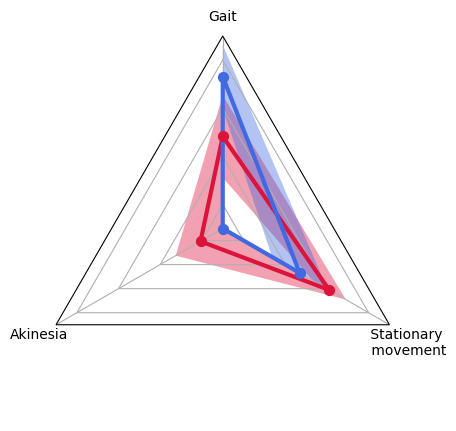

In [10]:
labels = ["Gait", "Akinesia",  "\n Stationary \n movement"]
    
N = 3
theta = spider_factory.spider_factory(N, frame='polygon')

fig, ax = plt.subplots(figsize=(5, 5),
                            subplot_kw=dict(projection='radar'))

zorder = 1
data = stats[(stats["group"]==True) & (stats["condition"]=="baseline")]
spider_factory.plot_spider_single_trace(ax, data, color="crimson", theta=theta)
spider_factory.plot_spider_single_trace(ax, stats[(stats["group"]==False) & (stats["condition"]=="baseline")], color="royalblue", theta=theta)


ax.set_ylim(0, 80)
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.set_rgrids([10, 30, 50, 70])
ax.set_varlabels(labels)

#plt.savefig("boilerplate_example_states.svg" ,transparent=True)

In [11]:
ncs.freqs = pd.read_pickle("./freqs.pkl")

In [12]:
max_freq = 100
min_freq = 5

idx_max = processing.find_closest_index(ncs.freqs, max_freq)
idx_min = processing.find_closest_index(ncs.freqs, min_freq)

In [13]:
df = ncs.plot_prep_psds_dataset(test_sbj_list=pda, condense=True)

In [14]:
df[df["group"] == True].head(5)

,subject,condition,event_gait,event_nlm,event_fog,group
0,NWE00130,baseline,"[7.700155, 35.852634, 18.280584, 4.251594, 3.7...","[7.1273823, 34.738632, 13.82882, 6.276072, 5.2...","[6.6896896, 34.363136, 12.691377, 4.172866, 5....",True
1,NWE00130,cervical125,"[5.428129, 34.610428, 15.265413, 2.9339435, 2....","[7.0085664, 35.285408, 13.780792, 3.5994895, 3...","[6.409625, 35.018906, 12.921191, 4.4829187, 4....",True
2,NWE00130,cervical40,"[6.8879814, 31.38297, 16.258255, 3.4334824, 2....","[7.0990953, 34.377922, 14.673093, 3.4678595, 2...","[6.3135886, 29.972769, 11.827717, 4.269376, 5....",True
9,NWE00160,baseline,"[8.911066, 36.37505, 18.393803, 5.495706, 3.72...","[10.099365, 40.38185, 15.080096, 3.4323914, 1....","[9.614545, 40.348915, 8.879055, 4.4661875, 4.5...",True
10,NWE00160,cervical125,"[6.141581, 36.417072, 16.629639, 3.972267, 2.1...","[7.6479807, 33.596912, 19.159771, 4.5740914, 3...",None,True


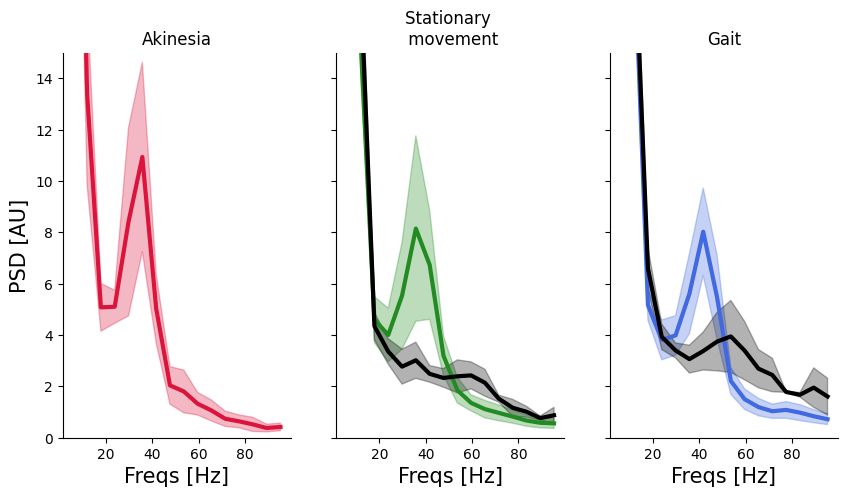

In [15]:
fig, axs = plt.subplots(1,3, sharey=True, figsize=(10,5))
colors = ["crimson" ,"forestgreen", "royalblue", ]
states = ["event_fog", "event_nlm", "event_gait",]
titles = ["Akinesia", "Stationary \n movement", "Gait"]


# Plot Parkinson's animals
for i, ax in enumerate(axs):
    neural_correlates_plot.plot_psd_single_state(ax, df,  group=True, 
                      condition="baseline", 
                      state=states[i], 
                      freqs=ncs.freqs, 
                      color=colors[i], 
                      idx_min=idx_min, 
                      idx_max=idx_max)
    ax.set_xlabel("Freqs [Hz]", fontsize=15)    
    ax.set_title(f"{titles[i]}")
    
# Plot Sham animals
for i, ax in enumerate(axs[1:]):
    i = i+1
    neural_correlates_plot.plot_psd_single_state(ax, df,  group=False, 
                      condition="baseline", 
                      state=states[i], 
                      freqs=ncs.freqs, 
                      color="k", 
                      idx_min=idx_min, 
                      idx_max=idx_max)
    
ylim = 15 #zscore

axs[0].set_ylabel("PSD [AU]", fontsize=15)    
ax.set_ylim(0, ylim)
for a in axs:
    a.spines[['right', 'top']].set_visible(False)